# ModMax 
## for finding the maximum modularity in a network using simulated annealing

This notebook is intended to show what and how the *ModMax* class works.

The [modularity](https://tinyurl.com/p8qrjed) of a network evaluates the fitness of a given partition of nodes into a set of modules.

The key objects here are:

- **G** -- a networkx graph object
- **Mod** -- a class defined in boxcluster used to represent a set of modules and related operations
- **ModMax** -- a class for simulated annealing using the **G** and **Mod** objects

In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# global imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
# boxcluster imports
import boxcluster
from boxcluster import mod
from boxcluster.modmax import ModMax
from boxcluster.modmax import largest_connected
from boxcluster.fake_data import generate_nested_data

In [18]:
# local imports from boxcluster_tutorial
from network_functions import get_graph, plot_modules

0 disconnected nodes removed


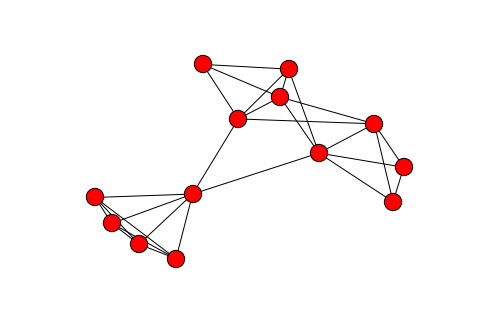

In [19]:
# read a simple sample datafile
graph_file = "./testnet.dat"
G = get_graph(graph_file)
# get the total number of edges
L0 = G.size()
# get the giant component
G = largest_connected(G)
L = G.size()
print(L0 - L, 'disconnected nodes removed')

nx.draw(G)
plt.show()

# Solve Example

In [21]:
# initalize ModMax with the graph
mm = ModMax(G)

# run simmulated annealing to find modules
mods = mm(save_history=True)

print('Final Modularity:', mods.fitness)

Final Modularity: 0.12130177514792906


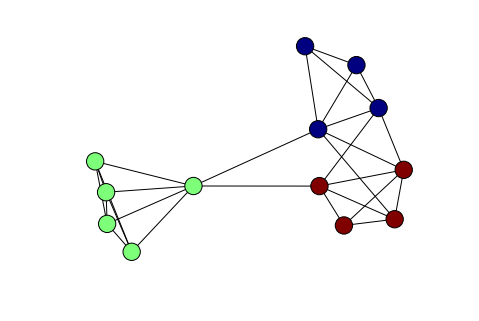

In [24]:
# plot results
plot_modules(modules=mods, G=G)
plt.show()

# Show Optimization Progress

Because we ran **bc** using while saving history, `bc(save_history=True)`, we've got a list of namedtuples (from collections) that let us introspect how the simulated annealing algorithm ran. 

Each of the named tuple (called a *trace*) contains seven elements:
- evals (a counter)
- last_move (turns since move was accepted)
- move_accepted (boolean, some moves are stored but not accepted)
- temp (current temperature)
- current_fit (fitness/energy of current state)
- new_fit (fitness/energy of proposed move)

In [25]:
df = pd.DataFrame(mm.history).set_index('evals')
df.head()

,last_move,moves_this_temp,move_accepted,temp,current_fit,new_fit
evals,,,,,,
0,0,0,True,0.001,-1.668639,-1.668639
1,0,0,True,0.001,-1.431953,-1.431953
2,0,0,True,0.001,-1.289941,-1.289941
3,1,0,False,0.001,-1.289941,-1.538462
4,2,0,False,0.001,-1.289941,-1.322485


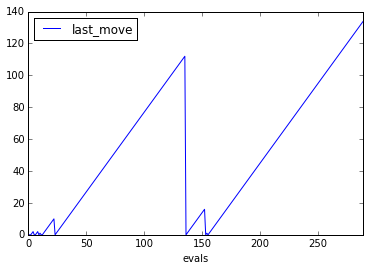

In [26]:
df[['last_move']].plot()

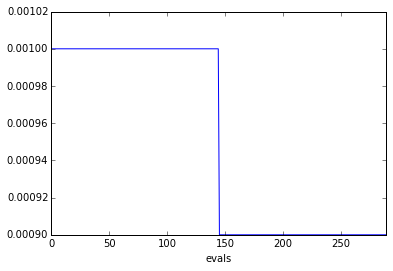

In [27]:
df['temp'].plot()

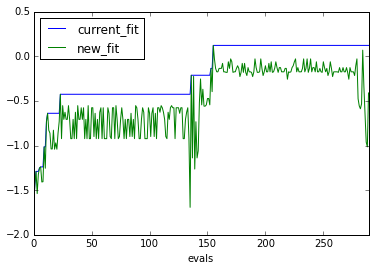

In [28]:
df[['current_fit', 'new_fit']].plot()